In [320]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter
import matplotlib.patches as patches
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [97]:
df = pd.read_pickle("store.pickle")
# df.head()

# step 1

In [81]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 8

In [110]:
line_zero = df.iloc[0]
curr_rect = one_ex.currRect
prev_rect = one_ex.prevRect
# curr_rect

In [84]:
cimage = MEImage.from_file(one_ex.currImage)
pimage = MEImage.from_file(one_ex.prevImage)

In [109]:
# plt.imshow(pimage.im,cmap='gray',origin='lower')
# plt.imshow(cimage.im,cmap='gray')

In [88]:
prev_rect_mat = pimage.im[prev_rect[2]:prev_rect[3],prev_rect[0]:prev_rect[1]]
curr_rect_mat = cimage.im[curr_rect[2]:curr_rect[3],curr_rect[0]:curr_rect[1]]

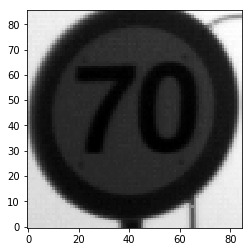

In [306]:
# plt.imshow(prev_rect_mat,cmap='gray',origin='lower')
plt.imshow(curr_rect_mat,cmap='gray',origin='lower')

In [90]:
prev_dx = sg.convolve2d(prev_rect_mat, sobel_kernel_x, "same")
prev_dy = sg.convolve2d(prev_rect_mat, sobel_kernel_y, "same") 

In [91]:
# plt.imshow(prev_dx,cmap='gray',origin='lower')
# plt.imshow(prev_dy,cmap='gray',origin='lower')

In [94]:
max_prev_dx = maximum_filter(prev_dx, 5)
max_prev_dy = maximum_filter(prev_dy, 5)

In [96]:
# plt.imshow(max_prev_dx,cmap='gray',origin='lower')
# plt.imshow(max_prev_dy,cmap='gray',origin='lower')

# step 2

In [100]:
prev_mat_xx = prev_dx ** 2
prev_mat_yy = prev_dy * prev_dy
prev_mat_xy = prev_dx ** 2

# step 3

In [151]:
patch_filter = np.ones((5,5)) / 9
# patch_filter

In [197]:
sxx = sg.convolve2d(prev_mat_xx, patch_filter, "same")
sxy = sg.convolve2d(prev_mat_xy, patch_filter, "same")
syy = sg.convolve2d(prev_mat_yy, patch_filter, "same")

In [199]:
for x in range(prev_rect_mat.shape[0]):
    for y in range(prev_rect_mat.shape[1]):
        sxx[x][y] = prev_mat_xx[x-2:x+2,y-2:y+2].sum()
        sxy[x][y] = prev_mat_xy[x-2:x+2,y-2:y+2].sum()
        syy[x][y] = prev_mat_yy[x-2:x+2,y-2:y+2].sum()

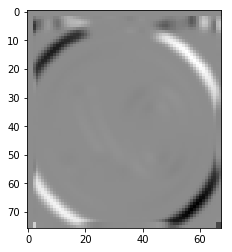

In [210]:
plt.imshow(sxx,cmap='gray',origin='lower')
plt.imshow(sxy,cmap='gray')
# plt.imshow(syy,cmap='gray',origin='lower')

# step 4 + 5

In [203]:
R = np.zeros(prev_mat_xx.shape)
k = 0.05

In [431]:
for x in range(prev_rect_mat.shape[0]):
    for y in range(prev_rect_mat.shape[1]):
        H = np.array([[sxx[x][y], sxy[x][y]], [sxy[x][y], syy[x][y]]])
        R[x][y] = np.linalg.det(H) - k*((np.trace(H))**2)
#         R[x][y] = 2*np.linalg.det(H)/(np.trace(H) + 0.01)

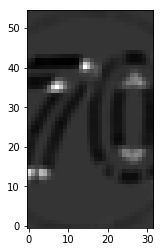

In [432]:
plt.imshow(R[15:70,18:50],cmap='gray',origin='lower')
# plt.imshow(max_R,cmap='gray',origin='lower')

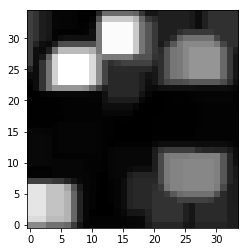

In [422]:
max_R = maximum_filter(R, 5)
plt.imshow(max_R[25:60,18:52],cmap='gray',origin='lower')

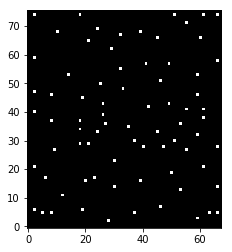

In [423]:
mask = np.zeros(prev_mat_xx.shape)
mask[R == max_R ] = 1
plt.imshow(mask,cmap='gray',origin='lower')

In [413]:
# threshold = max_R.mean()
# max_R[max_R > threshold] = 0
# max_R[max_R > threshold*2] = 0

In [376]:
# plt.imshow(max_R[25:60,18:52],cmap='gray',origin='lower')
# plt.imshow(max_R,cmap='gray',origin='lower')

In [375]:
# plt.imshow(prev_rect_mat,cmap='gray',origin='lower')
# for x in range(3,prev_rect_mat.shape[0]-3):
#     for y in range(3,prev_rect_mat.shape[1]-3):
#         if max_R[x][y] >  max_R[x-3:x+3,y-3:y+3].mean():
#             rect = patches.Rectangle((x,y),1,1,linewidth=1,edgecolor='r',facecolor='none')
#             gca().add_patch(rect)

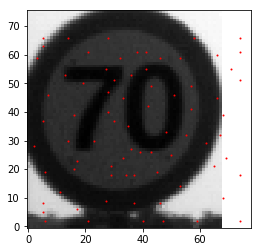

In [427]:
plt.imshow(prev_rect_mat,cmap='gray',origin='lower')
for x in range(prev_rect_mat.shape[0]):
    for y in range(prev_rect_mat.shape[1]):
        if mask[x][y]:
#             rect = patches.Rectangle((x-1,y-1),1,1,linewidth=1,edgecolor='r',facecolor='none')
#             gca().add_patch(rect)
            plt.scatter(x,y, c='r', s=1)